<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day2/9_Copy_of_Kr_text_network_analysis_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리 수행 후, 명사 단어 추출

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813256 sha256=b5500c61d8239295fdabddd21ee918785063f4c4850dbab3b33246b14e71f030
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [17]:
!pwd

/content


In [18]:
!ls

drive  sample_data


In [19]:
%cd /content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code

/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code


In [3]:
# 키위 형태소 분석기 사용
import re
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
kiwi = Kiwi()
stopwords = Stopwords()

# 사용자 정의 불용어를 키위 형태소 분석기의 불용어 사전에 추가하기
customized_stopwords = ['재테크','배포','금지', '기자', '페이스북']
for word in customized_stopwords:
    stopwords.add((word, 'NNG'))

# 전처리를 통해 명사 단어들 추출
def Kr_preprocessing(text):
    filtered_content = re.sub(r'[^\s\d\w]','',text)
    kiwi_tokens = kiwi.tokenize(filtered_content, stopwords=stopwords)
    Noun_words = []
    for token in kiwi_tokens:
        if 'NN' in token.tag:
            Noun_words.append(token.form)
    # 길이가 1인 단어 제거 하기
    final_Noun_words = []
    for word in Noun_words:
        if len(word)>1:
            final_Noun_words.append(word)
    return final_Noun_words

In [4]:
# 신문기사 내용 불러오기
with open('/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day1/python_code/Korean_news.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [5]:
content

'아셈 계기 영국·독일·태국 정상회담…대북제재 완화 설득 가속화문재인 대통령이 18일 오후(현지시간) 바티칸 교황청을 방문해 프란치스코 교황과 악수하고 있다. (청와대 페이스북) 2018.10.18/뉴스1(바티칸=뉴스1) 조소영 기자 = 프란치스코 교황이 18일(현지시간) 문재인 대통령과의 만남에서 사실상 방북(訪北)의사를 밝힘에 따라 문 대통령의 \'한반도 평화프로세스\' 추진에 상당한 힘이 실리게 됐다. 문 대통령은 교황의 지지를 기반으로 제2차 북미정상회담의 신속한 개최를 촉구하고 국제사회에 북한의 비핵화를 촉진하기 위해선 대북제재 완화가 일정 정도 필요하다는 주장을 이어갈 것으로 보인다.문 대통령은 이날 오후 12시5분 바티칸 교황궁 내 교황서재에서 40분 동안 프란치스코 교황을 단독 예방했다. 교황과의 만남은 원활한 의사소통을 위한 통역 외에 배석자 없이 \'비밀\'로 이뤄진다는 원칙에 따라 이날 예방도 통역을 위해 자리한 한현택 신부 외 누구도 배석하지 않은 것으로 전해졌다.다만 사전에 청와대와 바티칸 사이 협의를 거쳐 이례적으로 면담의 주요내용이 공개됐다. 이에 따라 윤영찬 청와대 국민소통수석이 밝힌 데 따르면 교황은 문 대통령이 김정은 북한 국무위원장의 방북 초청 의사를 전하면서 "김 위원장이 초청장을 보내도 좋겠느냐"고 하자 "공식 초청장을 보내주면 좋겠다"고 했다.교황은 이어 "초청장이 오면 무조건 응답을 줄 것이고 나는 갈 수 있다"고 했다. \'북한을 갈 수 있다\'고 완벽히 언급하지는 않았지만 문맥상 이는 북한 땅을 밟겠다는 뜻으로 해석됐다. 교황은 그러면서 "한반도에서 평화프로세스를 추진 중인 한국정부의 노력을 강력히 지지한다"며 "멈추지 말고 앞으로 나아가라. 두려워하지 말라"고 하면서 이 해석에 힘을 보탰다.윤 수석은 \'교황이 방북시점에 대한 언급은 없었느냐\'는 데에 "시점에 대해선 말이 없었다"고 전했다. 이에 따라 한편에선 교황의 답이 원론적 의미가 아니냐는 풀이도 나오지만 교황이 방북 자체에 문을 열어뒀다는 데에 의의가 있

In [6]:
# 전처리를 수행하여 불용어가 제거된 명사 단어들 추출
final_nouns = Kr_preprocessing(content)

In [7]:
print(final_nouns)

['아셈', '계기', '영국', '독일', '태국', '정상', '회담', '대북', '제재', '완화', '설득', '가속', '문재인', '대통령', '오후', '현지', '시간', '바티칸', '교황청', '방문', '프란치스코', '교황', '악수', '청와대', '페이스북', '뉴스1', '바티칸', '뉴스', '소영', '프란치스코', '교황', '현지', '시간', '문재인', '대통령', '만남', '사실', '방북', '의사', '대통령', '한반도', '평화', '프로세스', '추진', '상당', '대통령', '교황', '지지', '기반', '북미', '정상', '회담', '신속', '개최', '촉구', '국제', '사회', '북한', '비핵', '촉진', '대북', '제재', '완화', '일정', '정도', '필요', '주장', '대통령', '이날', '오후', '바티칸', '교황', '교황', '서재', '동안', '프란치스코', '교황', '단독', '예방', '교황', '만남', '원활', '의사소통', '통역', '배석자', '비밀', '원칙', '이날', '예방', '통역', '자리', '한현택', '신부', '배석', '사전', '청와대', '바티칸', '사이', '협의', '이례', '면담', '주요', '내용', '공개', '윤영', '청와대', '국민', '소통', '수석', '교황', '대통령', '김정은', '북한', '국무', '위원장', '방북', '초청', '의사', '위원장', '초청장', '공식', '초청장', '교황', '초청장', '응답', '북한', '언급', '문맥', '북한', '해석', '교황', '한반도', '평화', '프로세스', '추진', '한국', '정부', '노력', '지지', '해석', '수석', '교황', '방북', '시점', '언급', '시점', '한편', '교황', '원론', '의미', '풀이', '교황', '방북', '자체', '의의', '대통령', '추진', '유럽', '한반도',

# 단어 선택하기

In [8]:
from collections import Counter
c = Counter(final_nouns)

In [9]:
# 빈도 기준 상위 10개 단어들
c.most_common(10)

[('교황', 16),
 ('대통령', 12),
 ('한반도', 6),
 ('평화', 6),
 ('바티칸', 5),
 ('방북', 5),
 ('프로세스', 5),
 ('북한', 5),
 ('영국', 4),
 ('독일', 4)]

In [10]:
# Counter 클래스를 이용한 빈도 분석 결과물로부터 10개 단어 추출
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [11]:
# 빈도 분석 결과물로부터 단어들만 추출
selected_words = get_words(c.most_common(10))

In [12]:
selected_words

['교황', '대통령', '한반도', '평화', '바티칸', '방북', '프로세스', '북한', '영국', '독일']

In [13]:
#selected_words = ['교황', '한반도', '북한', '영국', '독일'] # You can selected a list of words based on other criterion

# 문장 단위로 쪼개기

In [14]:
# 텍스트 데이터를 문장 단위로 분할하고, 각 문장에 대해서 전처리 수행
def get_sentences(content):
    text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', content)
    text1 = re.sub(r'([\.\?\!])',r'\1 ', text1)
    sentences = re.split(r'[\.\?\!]\s+', text1)
    sentences = [Kr_preprocessing(sentence) for sentence in sentences if len(sentence)>0]
    return sentences

In [15]:
sentences = get_sentences(content)

# 네트워크 생성

In [20]:
# 네트워크 생성
import networkx as nx
from Kr_na import do_na
g = do_na(sentences, selected_words)

In [21]:
g.nodes()

NodeView(('교황', '대통령', '한반도', '평화', '바티칸', '방북', '프로세스', '북한', '영국', '독일'))

In [22]:
g['북한']

AtlasView({'교황': {'weight': 3}, '대통령': {'weight': 2}, '방북': {'weight': 2}})

In [23]:
g['대통령']

AtlasView({'바티칸': {'weight': 4}, '교황': {'weight': 6}, '영국': {'weight': 2}, '독일': {'weight': 2}, '방북': {'weight': 2}, '한반도': {'weight': 3}, '평화': {'weight': 3}, '프로세스': {'weight': 3}, '북한': {'weight': 2}})

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54889 (\N{HANGUL SYLLABLE HWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

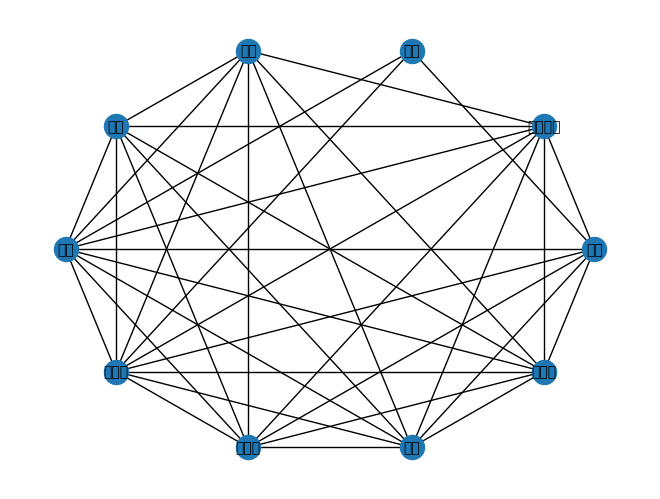

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code/malgun.ttf").get_name()
rc('font', family=font_name)
# 맥의 경우, /Library/Fonts 또는 /System/Library/Fonts 에 있는 한글 폰트 사용

pos=nx.shell_layout(g)
nx.draw_shell(g)
nx.draw_networkx_labels(g,pos,font_family=font_name,font_size=10)
plt.show()

In [27]:
nx.write_graphml(g, 'test_kr.graphml')

## 중심도 계산하기

In [28]:
# 디그리 중심도
sorted(nx.degree_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('교황', 1.0),
 ('대통령', 1.0),
 ('한반도', 0.8888888888888888),
 ('평화', 0.8888888888888888),
 ('바티칸', 0.8888888888888888),
 ('프로세스', 0.8888888888888888),
 ('방북', 0.7777777777777777),
 ('영국', 0.7777777777777777),
 ('독일', 0.7777777777777777),
 ('북한', 0.3333333333333333)]

In [29]:
# 매개 중심도
sorted(nx.betweenness_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('교황', 0.07407407407407408),
 ('대통령', 0.07407407407407408),
 ('방북', 0.037037037037037035),
 ('한반도', 0.009259259259259259),
 ('평화', 0.009259259259259259),
 ('바티칸', 0.009259259259259259),
 ('프로세스', 0.009259259259259259),
 ('북한', 0.0),
 ('영국', 0.0),
 ('독일', 0.0)]

In [30]:
# 근접 중심도
sorted(nx.closeness_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('교황', 1.0),
 ('대통령', 1.0),
 ('한반도', 0.9),
 ('평화', 0.9),
 ('바티칸', 0.9),
 ('프로세스', 0.9),
 ('방북', 0.8181818181818182),
 ('영국', 0.8181818181818182),
 ('독일', 0.8181818181818182),
 ('북한', 0.6)]